#Sample code for classification with multiple models

Load libraries

In [0]:
!pip install catboost

     |████████████████████████████████| 64.4MB 63kB/s 


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn import preprocessing
from sklearn.externals import joblib

Read data

In [0]:
# read the breast cancer wisconsin dataset
dataset = load_breast_cancer()

In [0]:
#30 features
dataset['data'].shape

(569, 30)

In [0]:
#binary target
dataset['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [0]:
dataset['target_names']

array(['malignant', 'benign'], dtype='<U9')

In [0]:
dataset['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

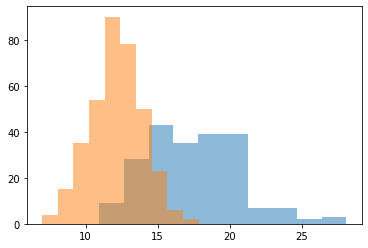

In [0]:
# show data
plt.hist(dataset['data'][:, 0][dataset['target']==0], label=dataset['target_names'][0], alpha=0.5)
plt.hist(dataset['data'][:, 0][dataset['target']==1], label=dataset['target_names'][1], alpha=0.5)
plt.show()

In [0]:
# image(numpy.ndarray)
X = dataset.data

# label(numpy.ndarray)
y = dataset.target

In [0]:
#split dataset to train and test dataset
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=True)#default is True

In [0]:
print(len(X_train), len(X_test))
print(len(y_train), len(y_test))

455 114
455 114


###Train model

In [0]:
models = {'decision tree' : DecisionTreeClassifier(),
                'random forest' : RandomForestClassifier(),
                'extra trees' : ExtraTreesClassifier(),
                'gradient boosting' : GradientBoostingClassifier(),
                'xgboost' : XGBClassifier(),
                'catboost' : CatBoostClassifier(verbose=False)}

In [0]:
for key in models:
  models[key].fit(X_train, y_train)

###Evaluation

k-th cross validation

In [0]:
def kth_cross_validation(model):
   #k-th cross validation
   cv = 3 #the number of foldings
   scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
   return scores

In [0]:
for key in models:
  scores = kth_cross_validation(models[key])
  print(key, scores.mean())

decision tree 0.9165214360404322
random forest 0.951681770651795
extra trees 0.9560677355640758
gradient boosting 0.9385383989775763
xgboost 0.9384948297897061
catboost 0.9495033112582781


various scores

In [0]:
for key in models:
   y_train_pred = cross_val_predict(models[key], X_train, y_train, cv=3)
   print(key, classification_report(y_train, y_train_pred))

decision tree               precision    recall  f1-score   support

           0       0.87      0.90      0.89       167
           1       0.94      0.92      0.93       288

    accuracy                           0.92       455
   macro avg       0.91      0.91      0.91       455
weighted avg       0.92      0.92      0.92       455

random forest               precision    recall  f1-score   support

           0       0.94      0.90      0.92       167
           1       0.94      0.97      0.96       288

    accuracy                           0.94       455
   macro avg       0.94      0.93      0.94       455
weighted avg       0.94      0.94      0.94       455

extra trees               precision    recall  f1-score   support

           0       0.96      0.92      0.94       167
           1       0.95      0.98      0.96       288

    accuracy                           0.95       455
   macro avg       0.95      0.95      0.95       455
weighted avg       0.95      0.95 

In [0]:
def plot_pr_curve(y, y_score, label=None):

    fpr, tpr, thresholds = precision_recall_curve(y, y_score)
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [1, 0], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()

    return

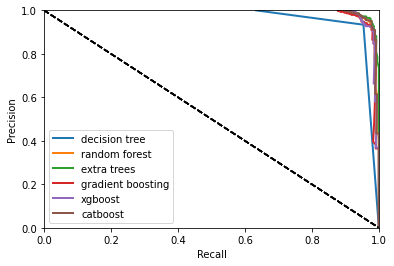

In [0]:
for key in models:
   y_train_probas = cross_val_predict(models[key], X_train, y_train, cv=3, method='predict_proba')
   y_train_scores = y_train_probas[:, 1]
   plot_pr_curve(y_train, y_train_scores, label=key)

In [0]:
def plot_roc_curve(y, y_score, label=None):

    fpr, tpr, thresholds = roc_curve(y, y_score)
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()

    return

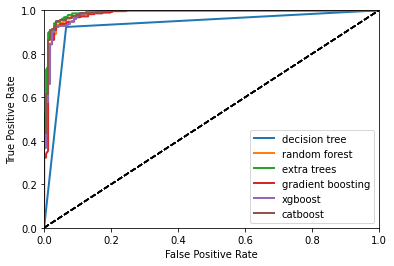

In [0]:
for key in models:
   y_train_probas = cross_val_predict(models[key], X_train, y_train, cv=3, method='predict_proba')
   y_train_scores = y_train_probas[:, 1]
   plot_roc_curve(y_train, y_train_scores, label=key)

In [0]:
for key in models:
   y_train_probas = cross_val_predict(models[key], X_train, y_train, cv=3, method='predict_proba')
   y_train_scores = y_train_probas[:, 1]
   auc_score = roc_auc_score(y_train, y_train_scores)
   print(key, auc_score)

decision tree 0.9096494510978045
random forest 0.986433383233533
extra trees 0.9918080505655356
gradient boosting 0.9834497671324018
xgboost 0.9851131071190952
catboost 0.9885853293413174


###Test

In [0]:
for key in models:
  result = models[key].score(X_test, y_test)
  print(key, result)

decision tree 0.9298245614035088
random forest 0.9824561403508771
extra trees 0.9824561403508771
gradient boosting 0.9824561403508771
xgboost 1.0
catboost 0.9912280701754386
